In [1]:
!pip install jovian --upgrade --quiet


     |████▊                           | 10 kB 16.2 MB/s eta 0:00:01
     |█████████▌                      | 20 kB 7.8 MB/s eta 0:00:01
     |██████████████▎                 | 30 kB 10.8 MB/s eta 0:00:01
     |███████████████████             | 40 kB 4.5 MB/s eta 0:00:01
     |███████████████████████▉        | 51 kB 4.6 MB/s eta 0:00:01
     |████████████████████████████▋   | 61 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 68 kB 3.2 MB/s 


In [2]:
import jovian

# US Accidents Exploratory Data Analysis
Weekly challenge: Week 1  
Date: 7/262022

## Download the Data  

US Accidents (2016 - 2021)
https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

In [3]:
pip install opendatasets --upgrade --quiet # removes output from the pip command

In [4]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: unpatel1
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:02<00:00, 99.8MB/s]


In [5]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'

## Data Preparation and Cleaning

 1. Load the file using Pandas
 2. Look at some info about the data & the columns
 3. Fix any missing or incorrect values

In [6]:
import pandas as pd
import seaborn as sns
import warnings
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(12,6)})

**1. Load the file**

In [7]:
df = pd.read_csv(data_filename)

In [8]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


Uploading a US population .CSV file to google drive

In [9]:
from google.colab import files
uploaded = files.upload()

Saving US_popul_2021.csv to US_popul_2021.csv


In [10]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
df_pop = pd.read_csv('/content/US_popul_2021.csv')

In [12]:
df_pop.head(3)

,State,Population
0,AL,5039877
1,AK,732673
2,AZ,7276316


In [13]:
#df_with_pop = pd.merge(df, df_pop, on='State')

In [14]:
#df_with_pop.head(3)

**2. Info about the data & columns**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

**3. Fix any missing or incorrect values**

Percentage of missing values per column

In [16]:
missing_percentages = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [17]:
missing_percentages[missing_percentages != 0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

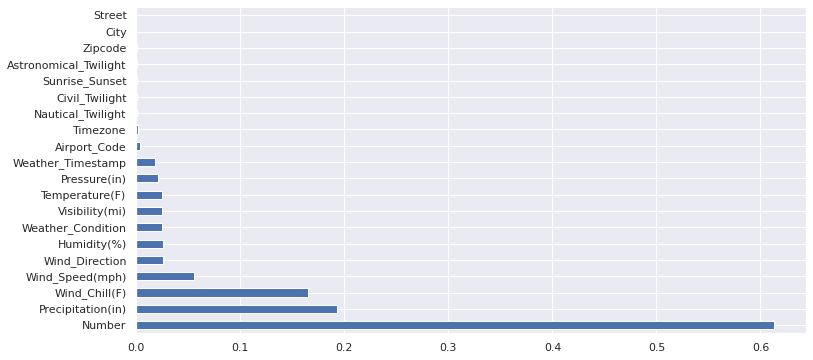

In [18]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

Remove columns that you don't want to use. -- optional step

## Exploratory Analysis and Visualization

Columns we will analyze:

1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition

In [19]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### 1. City

In [20]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [21]:
cities = df.City.unique()

In [22]:
len(cities)

11682

In [23]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [24]:
cities_by_accident[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

In [26]:
len(df.State.unique())

49

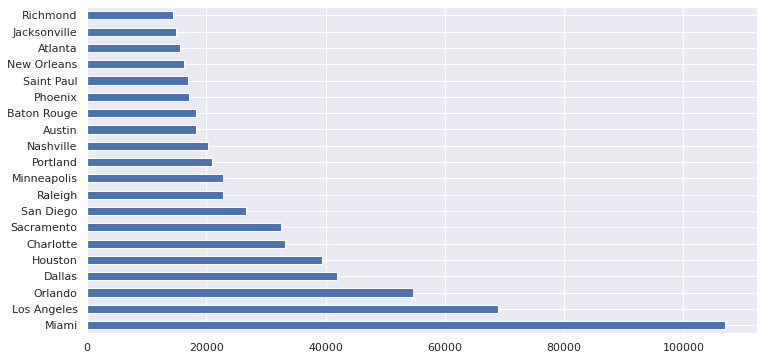

In [27]:
cities_by_accident[:20].plot(kind = 'barh')

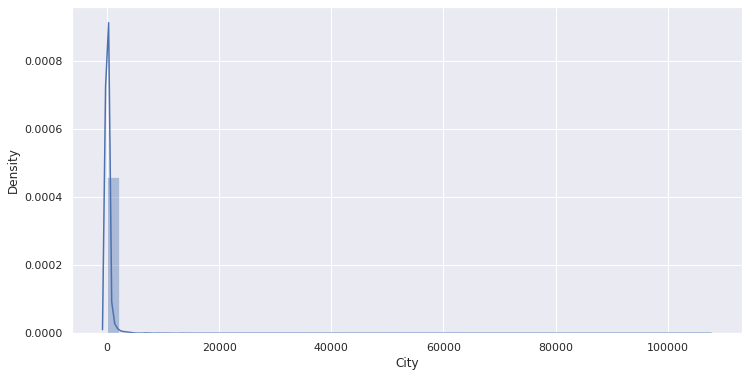

In [28]:
sns.distplot(cities_by_accident)

In [29]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [30]:
len(high_accident_cities) / len(cities) * 100

4.245848313644924

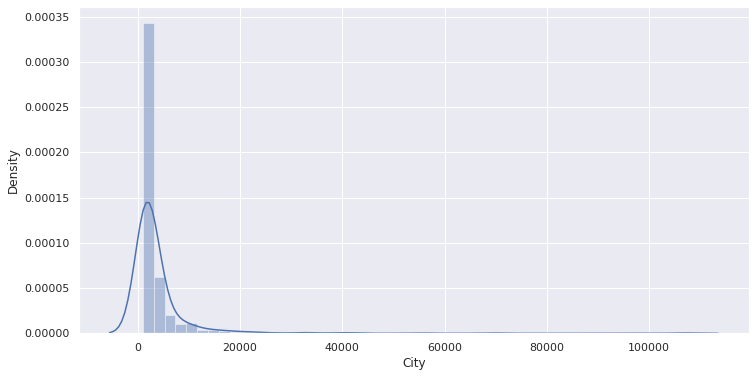

In [31]:
sns.distplot(high_accident_cities)

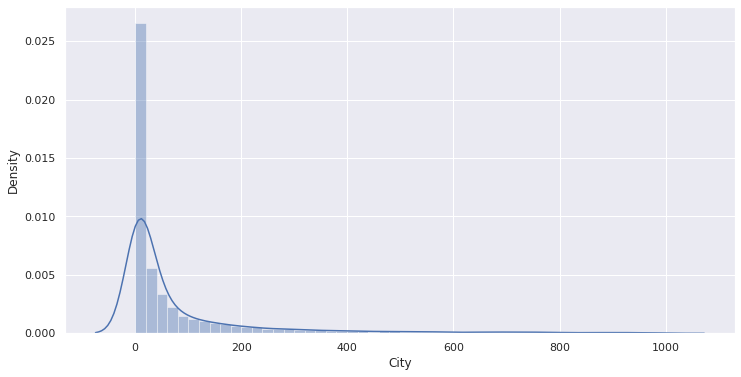

In [32]:
sns.distplot(low_accident_cities)

In [34]:
very_low_accident_cities = cities_by_accident[cities_by_accident < 100]

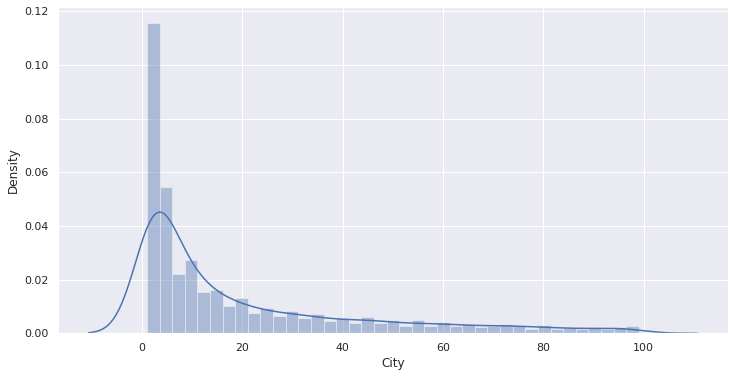

In [35]:
sns.distplot(very_low_accident_cities)

Number of accidents per city in the bbove 3 plots follows some sort of exponential distribution. When working with exponential distribution graph, it would be better to plot with a log scale.

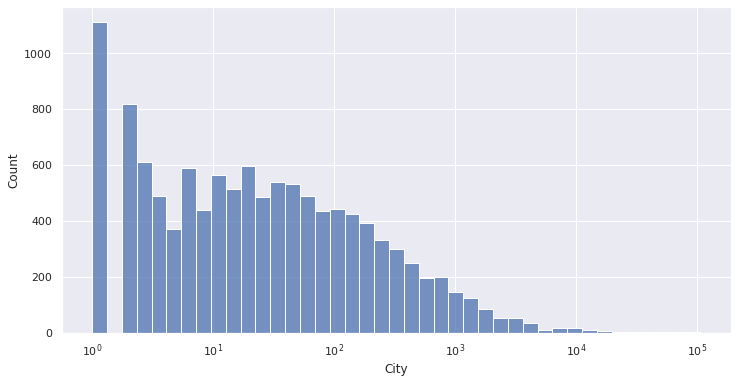

In [36]:
sns.histplot(cities_by_accident, log_scale = True)

### 2. Start Time

In [37]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [38]:
# Converting string date to datetime date
df.Start_Time = pd.to_datetime(df.Start_Time)

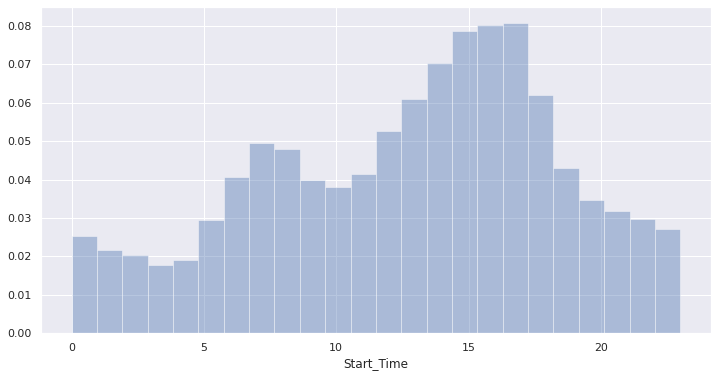

In [39]:
# Accident time of the day
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde = False, norm_hist = True)

- A high percentage of accidents occur between 6 am and 9 am (probably people in a hurry to get to work)
- Next highest percentage is 12 noon to 6 pm

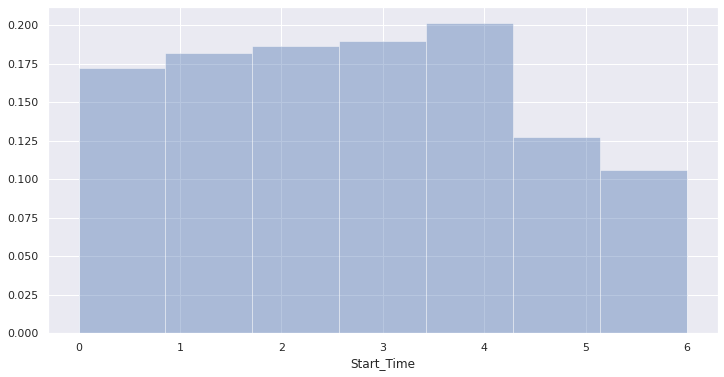

In [40]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist = True)

Is the distribution of accidents by hour the same as weekends as on weekdays.

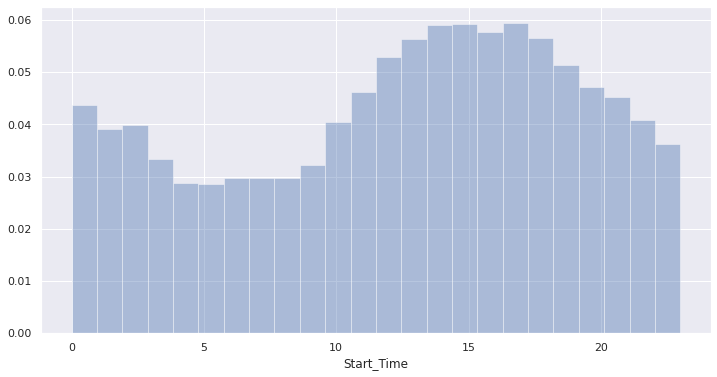

In [41]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)

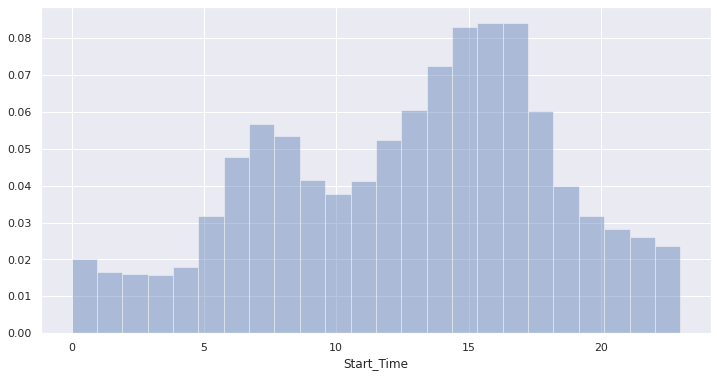

In [42]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(mondays_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)

On Sundays, the peak occurs between 12 noon and 7 pm, unlike weekdays.

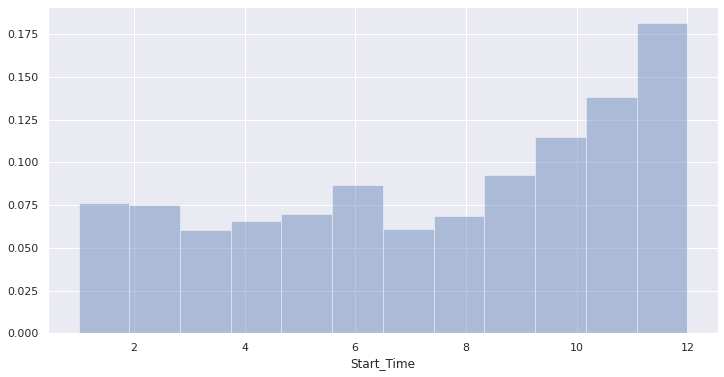

In [43]:
sns.distplot(df.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

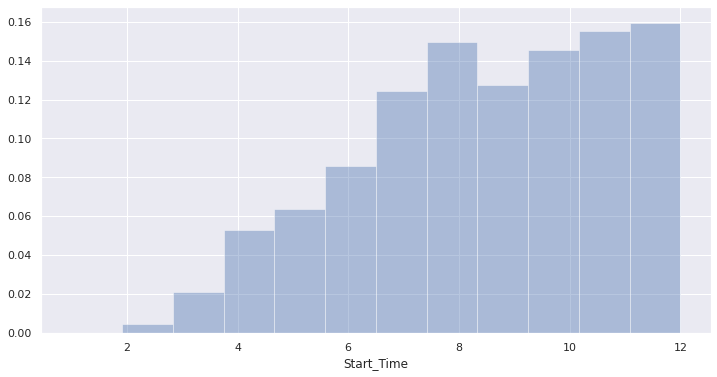

In [44]:
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

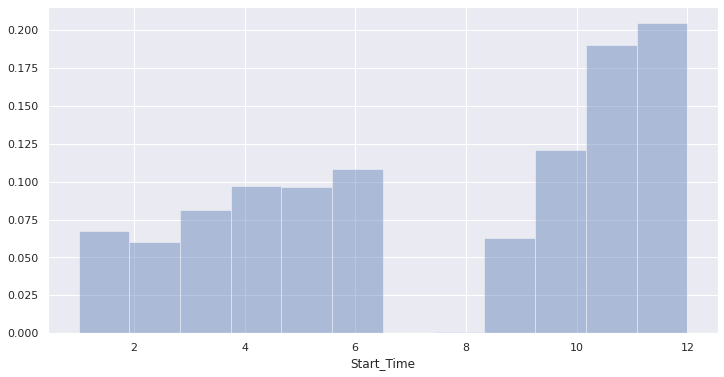

In [45]:
df_2020 = df[df.Start_Time.dt.year == 2020]
sns.distplot(df_2020.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

Q, Can you explain the month-wise trend of accidents?

-- It looks like some data is missing for year 2016 and 2020.  
-- There are more accidents in November and December.

### 3. Start Latitude & Longitude

In [46]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [47]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

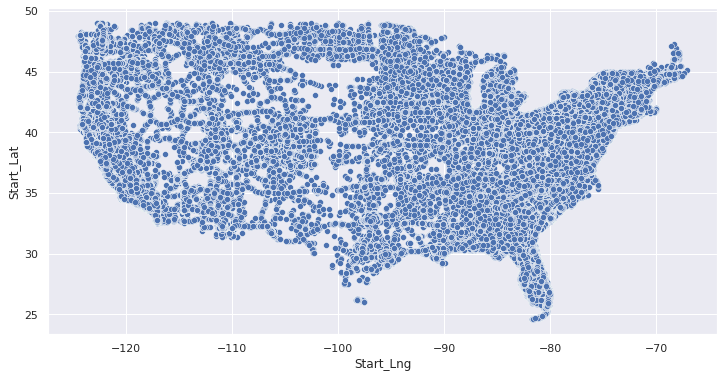

In [48]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat)

In [49]:
df_state_groupby = df.groupby(by=["State"]).count().reset_index()

In [50]:
accdnt_per_state = df_state_groupby.iloc[:,[0,1]]

In [120]:
accdnt_per_state

,State,ID
0,AL,19322
1,AR,10935
2,AZ,56504
3,CA,795868
4,CO,25340
5,CT,29762
6,DC,9133
7,DE,4842
8,FL,401388
9,GA,40086


In [121]:
state_with_accdnt_popul = pd.merge(df_pop, accdnt_per_state, on='State')

In [122]:
state_with_accdnt_popul.columns = ['State','Population','Accidents']

In [123]:
state_with_accdnt_popul

,State,Population,Accidents
0,AL,5039877,19322
1,AZ,7276316,56504
2,AR,3025891,10935
3,CA,39237836,795868
4,CO,5812069,25340
5,CT,3605597,29762
6,DE,1003384,4842
7,DC,670050,9133
8,FL,21781128,401388
9,GA,10799566,40086


In [55]:
#state_with_accdnt_popul['per_capita_accdnt'] = state_with_accdnt_popul['Population'] / state_with_accdnt_popul['Accidents']

In [124]:
state_with_accdnt_popul['per_capita_accdnt'] = state_with_accdnt_popul['Accidents'] / state_with_accdnt_popul['Population']

In [125]:
state_with_accdnt_popul

,State,Population,Accidents,per_capita_accdnt
0,AL,5039877,19322,0.003834
1,AZ,7276316,56504,0.007765
2,AR,3025891,10935,0.003614
3,CA,39237836,795868,0.020283
4,CO,5812069,25340,0.004360
5,CT,3605597,29762,0.008254
6,DE,1003384,4842,0.004826
7,DC,670050,9133,0.013630
8,FL,21781128,401388,0.018428
9,GA,10799566,40086,0.003712


In [126]:
#sns.catplot(x="State", y="per_capita_accdnt", kind="bar", data=state_with_accdnt_popul, height=7, aspect=2.25)

In [127]:
sample_df = df.sample(int(0.1 * len(df)))

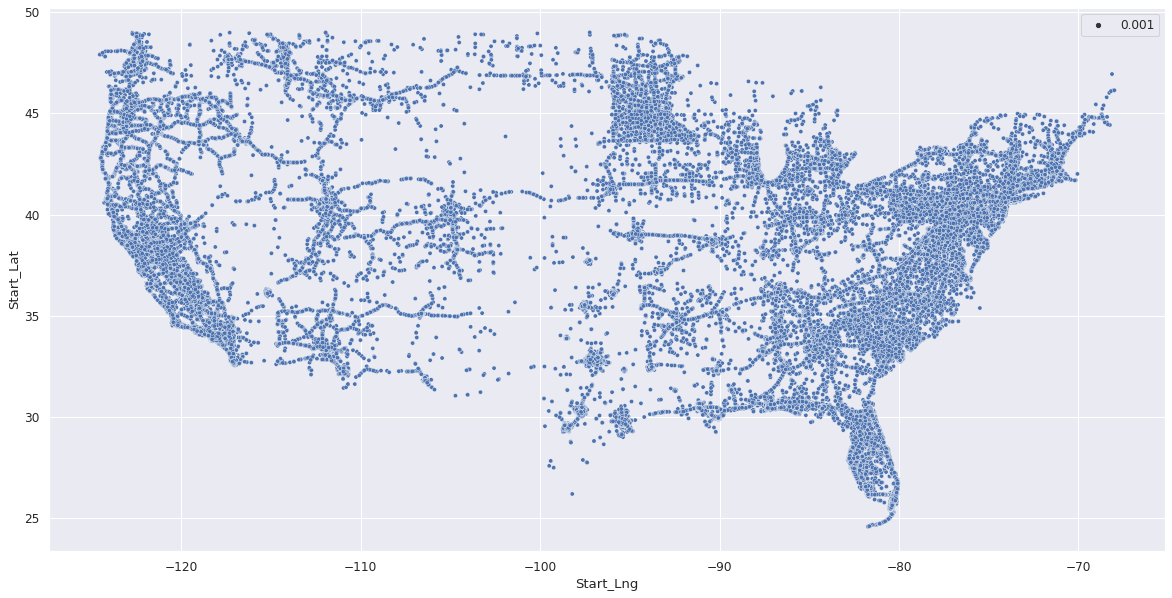

In [128]:
# This is an optional step to use a smaller size of avalable data.
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size = 0.001)

In [129]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [164]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

<Figure size 1080x504 with 0 Axes>

### 4 & 5. Temperature & Weather Condition

Question: Are there more accidents in warmer or colder areas?

In [131]:
# Converting string date to datetime date

df.Weather_Timestamp = pd.to_datetime(df.Weather_Timestamp)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               object        
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

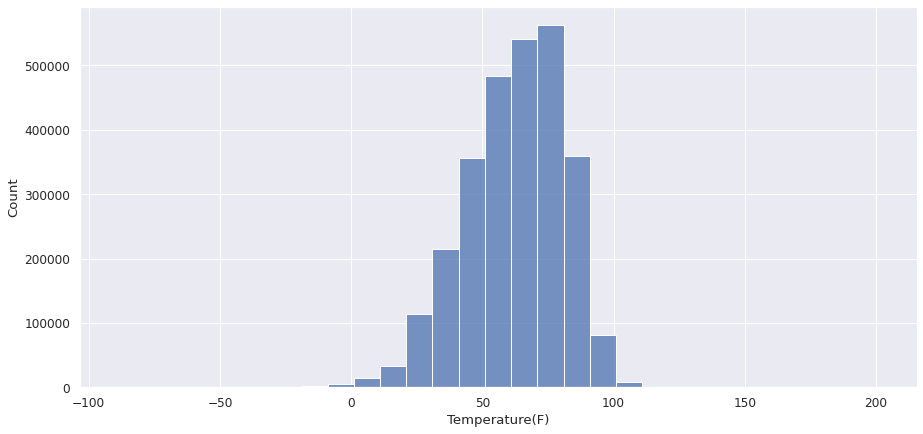

In [137]:
plt.figure(figsize = (15,7))
sns.histplot(data=df, x="Temperature(F)", binwidth=10)

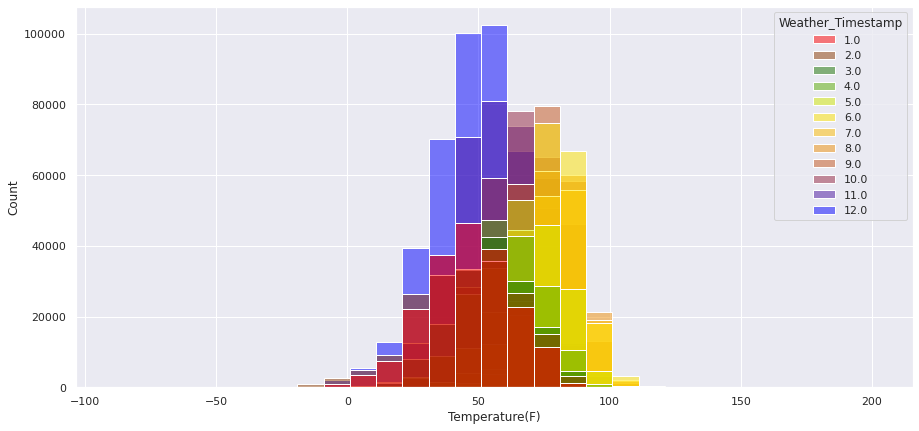

In [141]:
plt.figure(figsize = (15,7))
#sns.set(rc = {'figure.figsize':(18,9)})
my_plt = sns.blend_palette(['red','green','yellow','orange','brown','blue'], 12)
sns.histplot(data=df, x="Temperature(F)", hue=df['Weather_Timestamp'].dt.month, palette=my_plt, binwidth=10)

Observations:
- Most of the accidents occured between 30 F and 90 F weather temperature.
- Majority of the accidents below 60 F occured between the colder months of November and February.
- Majority of the accidents above 60 F occured between the warmer months of April and August.

In [140]:
df_cold = df[~(((df['Weather_Timestamp'].dt.month > 2) & (df['Weather_Timestamp'].dt.month < 11)))]

In [67]:
# sns.scatterplot(x=df_nov_to_feb.Start_Lng, y=df_nov_to_feb.Start_Lat)

In [68]:
#df_nov_to_feb_sample = df_nov_to_feb.sample(int(0.01 * len(df_nov_to_feb)))

In [69]:
#sns.scatterplot(x=df_nov_to_feb_sample.Start_Lng, y=df_nov_to_feb_sample.Start_Lat)

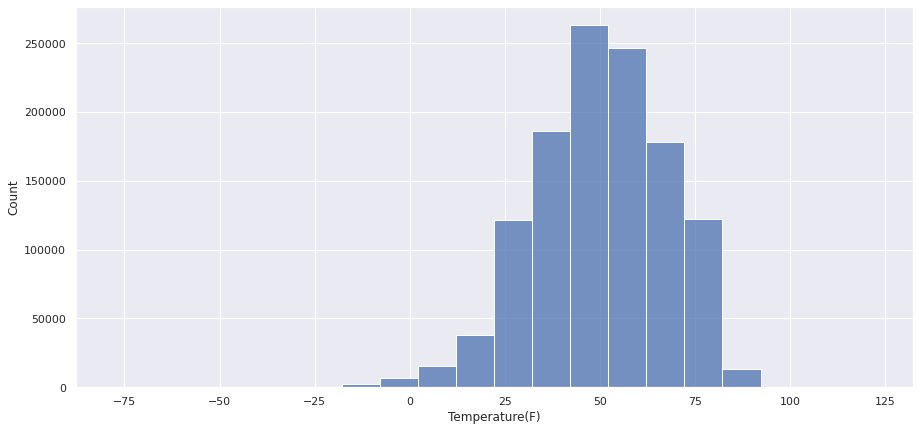

In [144]:
plt.figure(figsize = (15,7))
sns.histplot(data=df_cold, x="Temperature(F)", binwidth=10)

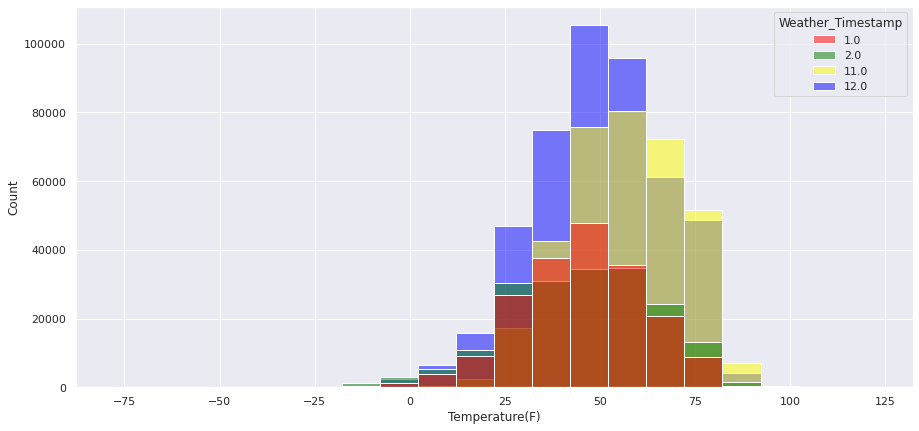

In [143]:
#sns.set(rc = {'figure.figsize':(20,10)})
plt.figure(figsize = (15,7))
my_plt_cold = sns.blend_palette(['red','green','yellow','blue'], 4)

sns.histplot(data=df_cold, x="Temperature(F)", hue=df_cold['Weather_Timestamp'].dt.month, palette=my_plt_cold, binwidth=10)

In [148]:
df_cold_groupby = df_cold.groupby(by=["State"]).count().reset_index()
accdnt_per_state_cold = df_cold_groupby.iloc[:,[0,1]]
accdnt_per_state_cold

,State,ID
0,AL,7715
1,AR,4602
2,AZ,21884
3,CA,358696
4,CO,10034
5,CT,11103
6,DC,3229
7,DE,1429
8,FL,186233
9,GA,17631


In [150]:
state_with_accdnt_popul.head(2)

,State,Population,Accidents,per_capita_accdnt
0,AL,5039877,19322,0.003834
1,AZ,7276316,56504,0.007765


In [151]:
state_with_accdnt_popul_cold = pd.merge(df_pop, accdnt_per_state_cold, on='State')
state_with_accdnt_popul_cold.columns = ['State','Population','Accidents_cold']
state_with_accdnt_popul_cold

,State,Population,Accidents_cold
0,AL,5039877,7715
1,AZ,7276316,21884
2,AR,3025891,4602
3,CA,39237836,358696
4,CO,5812069,10034
5,CT,3605597,11103
6,DE,1003384,1429
7,DC,670050,3229
8,FL,21781128,186233
9,GA,10799566,17631


In [149]:
#state_with_accdnt_popul_cold['per_capita_accdnt_cold'] = state_with_accdnt_popul_cold['Population'] / state_with_accdnt_popul_cold['Accidents_cold']
#state_with_accdnt_popul_cold

In [152]:
state_with_accdnt_popul_cold['per_capita_accdnt_cold'] = state_with_accdnt_popul_cold['Accidents_cold'] / state_with_accdnt_popul_cold['Population']
state_with_accdnt_popul_cold

,State,Population,Accidents_cold,per_capita_accdnt_cold
0,AL,5039877,7715,0.001531
1,AZ,7276316,21884,0.003008
2,AR,3025891,4602,0.001521
3,CA,39237836,358696,0.009142
4,CO,5812069,10034,0.001726
5,CT,3605597,11103,0.003079
6,DE,1003384,1429,0.001424
7,DC,670050,3229,0.004819
8,FL,21781128,186233,0.008550
9,GA,10799566,17631,0.001633


In [ ]:
#state_with_accdnt_popul['per_capita_accdnt2'] = state_with_accdnt_popul['Accidents'] / state_with_accdnt_popul['Population']

In [153]:
#sns.catplot(x="State", y="per_capita_accdnt_cold", kind="bar", data=state_with_accdnt_popul_cold, height=7, aspect=2.25)

In [154]:
#sns.catplot(x="State", y="per_capita_accdnt_cold2", kind="bar", data=state_with_accdnt_popul_cold, height=7, aspect=2.25)

In [155]:
state_with_accdnt_popul.columns

Index(['State', 'Population', 'Accidents', 'per_capita_accdnt'], dtype='object')

In [156]:
state_with_accdnt_popul_cold.columns

Index(['State', 'Population', 'Accidents_cold', 'per_capita_accdnt_cold'], dtype='object')

In [157]:
# Merging state_with_accdnt_popul and state_with_accdnt_popul_cold dataframes
# df1 = df1.merge(df2[["Key_Column", "Target_Column1", "Target_Column2"]])
state_with_accdnt_popul = state_with_accdnt_popul.merge(state_with_accdnt_popul_cold[["State",'Accidents_cold', 'per_capita_accdnt_cold']])

In [158]:
state_with_accdnt_popul

,State,Population,Accidents,per_capita_accdnt,Accidents_cold,per_capita_accdnt_cold
0,AL,5039877,19322,0.003834,7715,0.001531
1,AZ,7276316,56504,0.007765,21884,0.003008
2,AR,3025891,10935,0.003614,4602,0.001521
3,CA,39237836,795868,0.020283,358696,0.009142
4,CO,5812069,25340,0.004360,10034,0.001726
5,CT,3605597,29762,0.008254,11103,0.003079
6,DE,1003384,4842,0.004826,1429,0.001424
7,DC,670050,9133,0.013630,3229,0.004819
8,FL,21781128,401388,0.018428,186233,0.008550
9,GA,10799566,40086,0.003712,17631,0.001633


In [159]:
# Adding Accidents and per_capita_accdnt differences

#state_with_accdnt_popul['Accidents_diff'] = state_with_accdnt_popul['Accidents_cold'] - state_with_accdnt_popul['Accidents']
#state_with_accdnt_popul['per_capita_accdnt_diff'] = state_with_accdnt_popul['per_capita_accdnt_cold'] - state_with_accdnt_popul['per_capita_accdnt']

#state_with_accdnt_popul


In [160]:
#sns.catplot(x="State", y="Accidents_diff", kind="bar", data=state_with_accdnt_popul, height=7, aspect=2.25)

In [161]:
#sns.catplot(x="State", y="per_capita_accdnt_diff", kind="bar", data=state_with_accdnt_popul, height=7, aspect=2.25)

In [109]:
# Percentage reduction in accidents

#state_with_accdnt_popul['Accidents_diff_%'] = state_with_accdnt_popul['Accidents_diff'] / state_with_accdnt_popul['Accidents'] * 100

In [108]:
#sns.catplot(x="State", y="Accidents_diff_%", kind="bar", data=state_with_accdnt_popul, height=7, aspect=2.25)

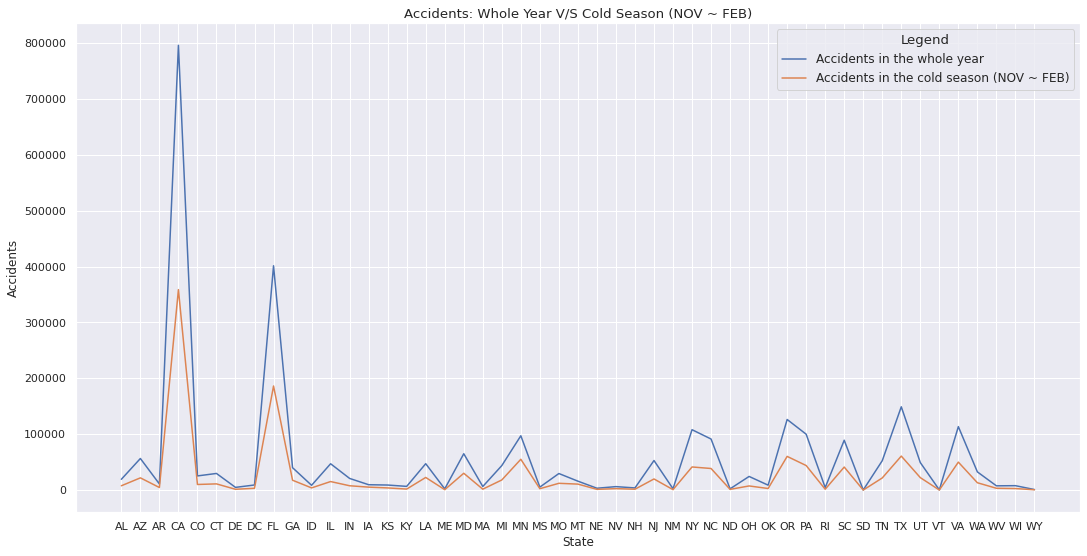

In [162]:
fig, ax = plt.subplots()
sns.set(font_scale=1.10)
ax = sns.lineplot(x='State', y='Accidents', data=state_with_accdnt_popul).set(title='Accidents: Whole Year V/S Cold Season (NOV ~ FEB)')
ax1 = sns.lineplot(x='State', y='Accidents_cold', data=state_with_accdnt_popul)
plt.legend(labels=["Accidents in the whole year","Accidents in the cold season (NOV ~ FEB)"], title = "Legend")

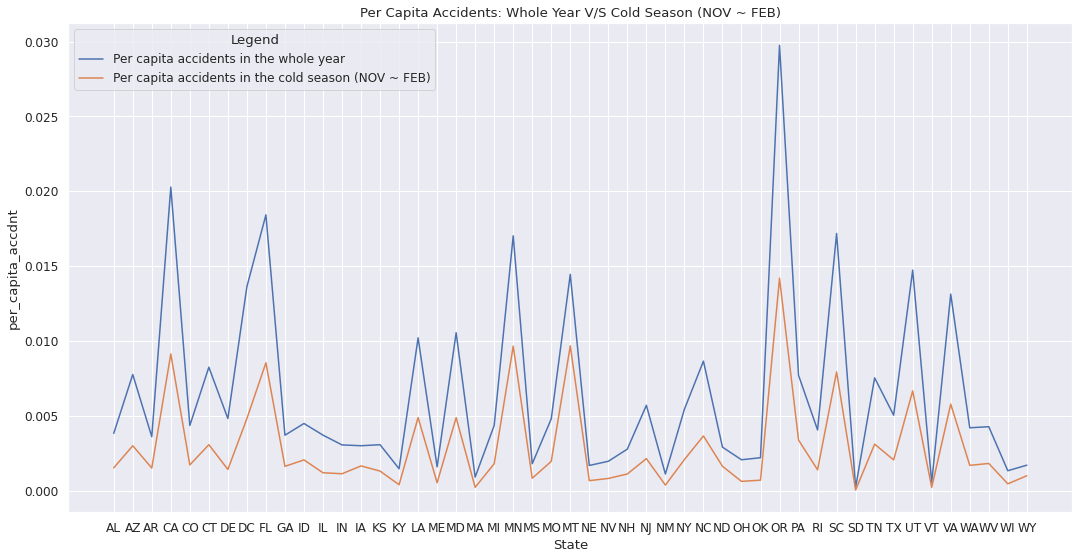

In [165]:
fig, ax = plt.subplots()
sns.set(font_scale=1.10)
ax = sns.lineplot(x='State', y='per_capita_accdnt', data=state_with_accdnt_popul).set(title='Per Capita Accidents: Whole Year V/S Cold Season (NOV ~ FEB)')
ax1 = sns.lineplot(x='State', y='per_capita_accdnt_cold', data=state_with_accdnt_popul)
plt.legend(labels=["Per capita accidents in the whole year","Per capita accidents in the cold season (NOV ~ FEB)"], title = "Legend")

-- 1. Are there more accidents in warmer or colder areas?

-- **PLOTS: Accidents: Whole Year V/S Cold Season (NOV ~ FEB)** and **Per Capita Accidents: Whole Year V/S Cold Season (NOV ~ FEB)** --- These plots do not show any trend of reduction in accidents for either warmer or colder states during the winter. So weather temperature does not have any conclusive effect on the reduction of accidents.

-- 2. Which 5 states have the highest number of accidents? How about per capita?

In [175]:
state_with_accdnt_popul.sort_values(by='Accidents', ascending=False).head(5)[['State','Accidents']]

,State,Accidents
3,CA,795868
8,FL,401388
41,TX,149037
35,OR,126341
44,VA,113535


In [174]:
state_with_accdnt_popul.sort_values(by='per_capita_accdnt', ascending=False).head(5)[['State','per_capita_accdnt']]

,State,per_capita_accdnt
35,OR,0.029754
3,CA,0.020283
8,FL,0.018428
38,SC,0.017188
21,MN,0.017028


-- 3. Does New York show up in the data? If yes, why is the count lower if this is the most populated city?

In [184]:
state_with_accdnt_popul[state_with_accdnt_popul.State == 'NY'][['State','Population','Accidents','per_capita_accdnt']]

,State,Population,Accidents,per_capita_accdnt
30,NY,19835913,108049,0.005447


In [192]:
df[df.City == 'New York']['City'].count()

7068

In [ ]:
df.sort_values(by='Accidents', ascending=False).head(5)[['State','Accidents']]

In [202]:
#state_with_accdnt_popul.sort_values(by='Accidents', ascending=False).head(5)[['State','Accidents']]

df_city = df.groupby(by=["City"]).count().reset_index()
df_city = df_city.sort_values(by='ID', ascending=False)
accdnt_per_city = df_city.iloc[:,[0,1]]

In [205]:
accdnt_per_city[:10]

,City,ID
6612,Miami,106966
5981,Los Angeles,68956
7773,Orlando,54691
2470,Dallas,41979
4836,Houston,39448
1772,Charlotte,33152
9108,Sacramento,32559
9235,San Diego,26627
8589,Raleigh,22840
6728,Minneapolis,22768


-- The dataset has only 7,068 records for New Your city which is a very small number compared to the other larger cities. It looks like very few accidents are recorded for New York city.

## Ask and Answer Questions

1. Are there more accidents in warmer or colder areas? ANSWERED
2. Which 5 states have the highest number of accidents? How about per capita? ANSWERED
3. Does New York show up in the data? If yes, why is the count lower if this is the most populated city? ANSWERED
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently?
5. What time of the day are accidents most frequent in? ANSWERED
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trends of accidents year over year (decreasing / increasing)?
9. When is the accidents per unit of trafic is highest?

## Summary and Conclusion

Insights:
- New York has relatively fewer accidents compared to the other larger cities
- The number of accidents per city decreases exponentially
- Less than 5% of cities have more than 1000 yearly accidents
- Over 1100 cities have reported just one accident (need to investigate)
- The dataset does not have any data for Alaska and Hawaii

## Areas for future work

- State-wise analysis
- Seasonal analysis